c:\Users\facud\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


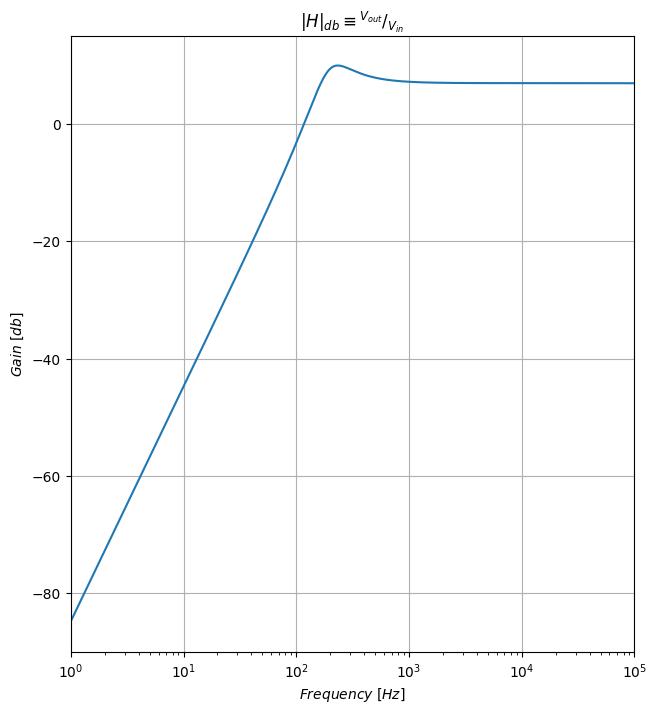

In [46]:
import ltspice
import numpy as np
import matplotlib.pyplot as plt
import os


OMEGA_D = 73.84
ALPHA = 0.19
OMEGA = 85.31
XI = 0.5

# ----------------------------     Graficos del circuito con valores fijos     --------------------------------------


#------------Load the signals from the .raw file
raw_file = 'BODE\\Simulacion_bode.raw'
l = ltspice.Ltspice(raw_file) 
# Make sure that the .raw file is located in the correct path
l.parse()
#-----------------------------------------------

#Parameters for the circuit
Fs = 2.5
Ts = 1/Fs

#----------------------------Obtain basic signals
frequency = l.get_frequency()
Vout = l.get_data('V(vout)')
Vin = l.get_data('V(vin)')
VoutDB = 20 * np.log10(Vout / Vin)
# phase = np.degrees(Vout)
#-------------------------------------------------


#Set max and min Voltages and currents
frequency_begin = 1
frequency_end = 100E3
gain_begin = -90
gain_end = 15


# Module plot
fig = plt.figure(figsize=(16,8))
plt.subplot(1, 2, 2)
plt.semilogx(frequency, VoutDB)
plt.title("$|H|_{db} \equiv  ^{V_{out}}/_{V_{in}}$")       #title
plt.xlabel("$Frequency\ [Hz]$")
plt.ylabel("$Gain\ [db]$")

plt.xlim(frequency_begin, frequency_end)
plt.ylim(gain_begin, gain_end)
plt.grid()

# Fase plot
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
# plt.semilogx(frequency, phase)
# plt.xlabel('Frecuencia [Hz]')
# plt.ylabel('Fase [grados]')
# plt.grid(True)
# plt.title('Diagrama de Bode - Fase')


# plt.subplot(2, 1, 2)
# plt.title("$V_L(t)$")
# plt.xlabel("$Time\ [m seg]$")
# plt.ylabel("$Tension [V]$", ha = 'right')
# plt.axvline(x = 210, linestyle='--', linewidth = 0.5,color='grey')
# plt.text(210, 3, r"$\ \ \mathrm{Descarga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
# plt.axvline(x = 10, linestyle='--', linewidth = 0.5,color='grey')
# plt.text(10, 4.2, r"$\ \ \mathrm{Carga} \rightarrow$", ha='left', va='bottom', rotation='horizontal')
# plt.plot([time[0], 21.555403], [3.8061319, 3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
# plt.text(0, 3.8061319, r" $V_{L_{Max}} = 3.81 $  ", ha='right', va='top', rotation='horizontal', color = 'lightblue', fontsize = 12)
# plt.plot([time[0], 10], [1.228, 1.228], linestyle = '--', linewidth = 1,  color = 'lightblue')
# plt.text(0, 1.228, r" $V_{L}(0) = 1.228 $  ", ha='right', va='center', rotation='horizontal', color = 'lightblue', fontsize = 12)
# plt.plot([time[0], 21.555403 + 200], [-3.8061319, -3.8061319], linestyle = '--', linewidth = 1,  color = 'lightblue')
# plt.text(0, -3.8061319, r" $V_{L_{Min}} = -3.81 $  ", ha='right', va='bottom', rotation='horizontal', color = 'lightblue', fontsize = 12)
# plt.plot([21.555403, 21.555403], [-5, 3.8061319], linestyle = '--', linewidth = 1,  color = 'magenta')
# plt.plot([64.418445, 64.418445], [-5, -0.61818752], linestyle = '--', linewidth = 1,  color = 'magenta')
# plt.annotate("", xy=(21.555403, -2.5), xytext=(64.418445, -2.5), arrowprops=dict(arrowstyle='<->'))
# plt.annotate(r"$\frac{T}{2} = \frac{\pi}{\omega_d}$", xy=(0.5*(21.555403+64.418445), -2.5), xytext=(0, 10),textcoords='offset points', ha='center', fontsize = 13)
# plt.xlim(0, 380)
# plt.ylim(V_lower_limit, V_upper_limit)
# plt.grid()

# plt.plot(time , Vl, 'b.')
#plt.savefig('Graficos circuito valores fijos.pdf', format='pdf')
plt.show()
